<a href="https://colab.research.google.com/github/JuanSepu18/THE-DISCRETE-PATHFINDER/blob/main/C%C3%B3digo_del_proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gurobipy
from gurobipy import * 

import pandas as pd
import math
import matplotlib as plt


     |████████████████████████████████| 11.5 MB 5.6 MB/s 


In [2]:
baseDeDatos = pd.read_excel("/content/drive/MyDrive/Datos_Direcciones.xlsx")
##baseDeDatos.rename(columns = {'Unnamed: 9': 'Latitudes', 'Unnamed: 10' : 'Longitudes'}, inplace = True)

In [3]:
baseDeDatos

,NUM,DIRECCION,Latitud,Longitud
0,0,Calle 18 No. 22-29 Colegio Franciscano del Vir...,7.13080,-73.12361
1,1,Calle 200 No. 12-518 Olimpo,7.06123,-73.10651
2,2,CALLE 201A #25-26 URB.BAVIERA /FLORIDA,7.06019,-73.09349
3,3,CALLE 9 NO. 13-14 APTO. 402 VILLABEL,7.08077,-73.10184
4,4,CRA. 21 NO. 35-264 CASA 15 QUINTAS DEL CAMPESTRE,7.12801,-73.12247
5,5,CALLE 21 NO. 11C - 21 ROSALES,7.07480,-73.10177
6,6,CRA. 12 NO. 200-105 T. 3 AP. 801 MEDITERRANE,7.06024,-73.10887
7,7,Cra. 14 No. 200-293 Apto. 201 EDIF TERRARIUM,7.05974,-73.10459
8,8,CRA. 24 NO. 35-30 ALTOS CAÑAVERAL CAMPESTRE,7.06723,-73.10552
9,9,Calle 198 # 22b-13 VILLA MARGARITA Floridablanca,7.06168,-73.10478


Imagen del mapa creado a partir de las coordenadas (el punto encerrado en amarillo corresponde al colegio o punto inicial).

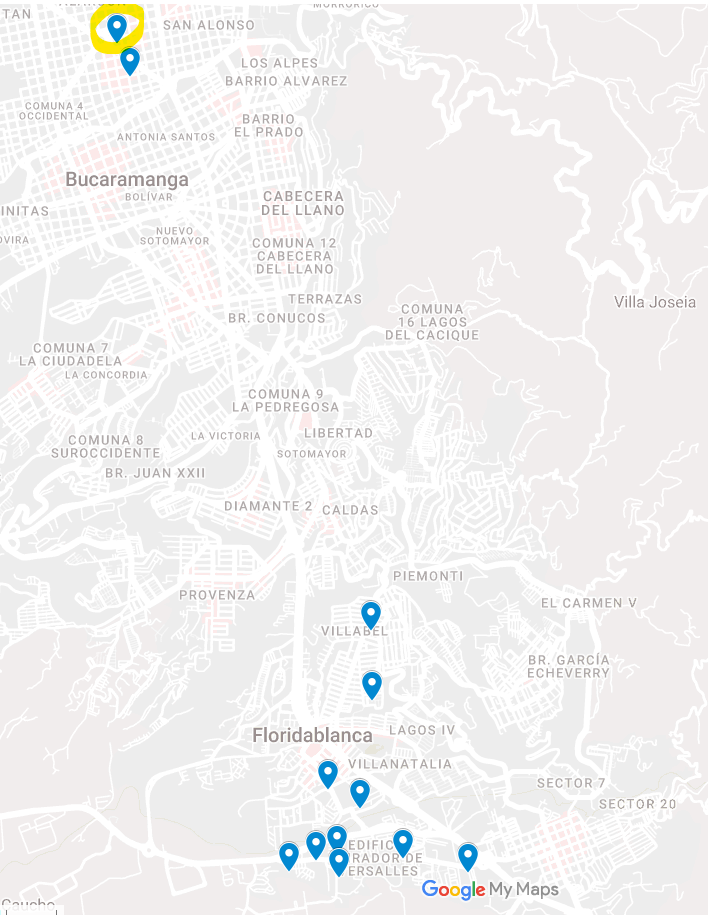

Imagen de los puntos para crear el grafo.

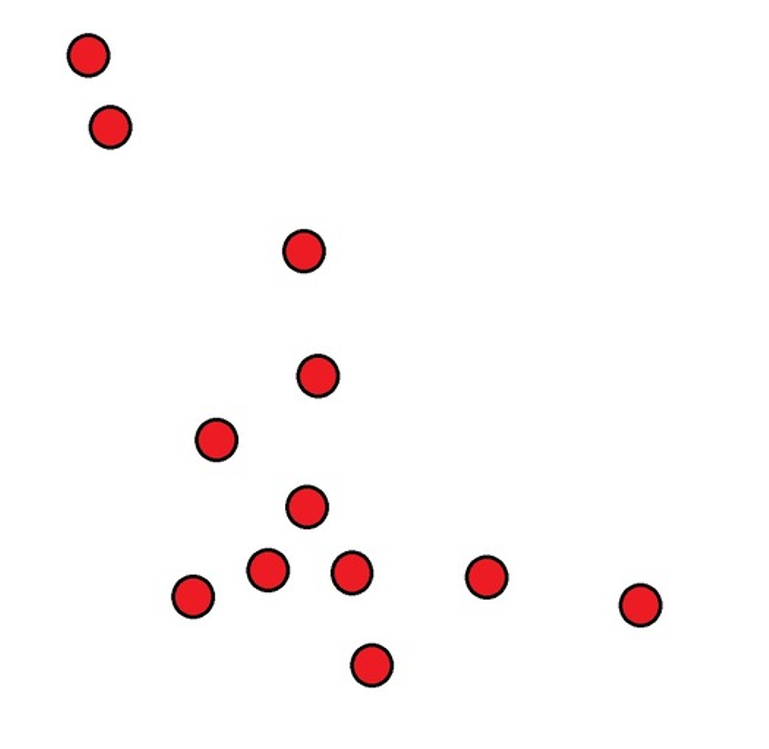

Imagen de los puntos para crear el grafo con índices asignados que concuerdan con las bases de datos.

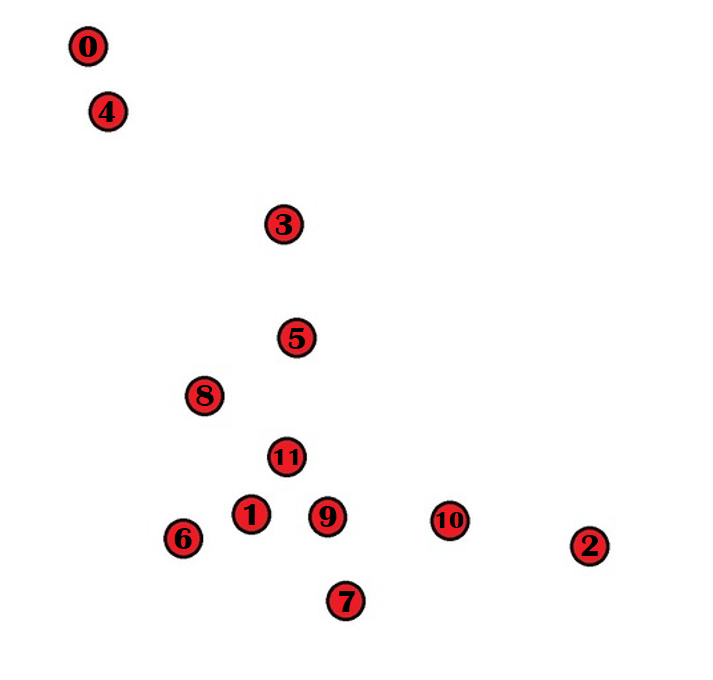

In [4]:
#Función para medir la distancia entre dos puntos del planeta según sus coordenadas, el resultado está dado en metros.
def distanciaEntreCoordenadas(lat1,long1,lat2,long2):
  rad = math.pi/180
  difLat = lat2-lat1
  difLong = long2-long1
  contenidoRaiz = (math.sin(rad * difLat / 2))**2 + math.cos(lat1*rad) * math.cos(lat2*rad) * ((math.sin(difLong*rad/2)))**2
  distancia = 2 * 6372000 * math.asin(math.sqrt(contenidoRaiz))

  return distancia

In [5]:
distanciaEntreCoordenadas(6.27823496943,-75.5694735416,6.28331696378,-75.5689742567)

567.8692781415872

In [6]:
arregloNodos = [i for i in range (0,len(baseDeDatos))]
matrizDistancias = {(i,j): distanciaEntreCoordenadas(baseDeDatos.at[i,'Latitud'],baseDeDatos.at[i,'Longitud'],baseDeDatos.at[j,'Latitud'],baseDeDatos.at[j,'Longitud']) for i in arregloNodos for j in arregloNodos if i!=j}
matrizArcos = {(i,j) for i in arregloNodos for j in arregloNodos if i != j}

In [7]:
#Matriz con las distancias entre todos los nodos
matrizDistancias

{(0, 1): 7963.872330691367,
 (0, 2): 8527.273369697155,
 (0, 3): 6060.494740797249,
 (0, 4): 334.8154236884268,
 (0, 5): 6678.016606619223,
 (0, 6): 8013.981437569192,
 (0, 7): 8176.768410546403,
 (0, 8): 7346.24474498824,
 (0, 9): 7962.940057380668,
 (0, 10): 8182.698753193768,
 (0, 11): 7605.933652215874,
 (1, 0): 7963.872330691367,
 (1, 2): 1441.6514502633472,
 (1, 3): 2233.376141828689,
 (1, 4): 7632.770957533286,
 (1, 5): 1597.2526473437736,
 (1, 6): 282.78457091976605,
 (1, 7): 269.0053367604827,
 (1, 8): 676.1609939636185,
 (1, 9): 197.38769141471568,
 (1, 10): 824.6240964773554,
 (1, 11): 641.4755229076233,
 (2, 0): 8527.273369697155,
 (2, 1): 1441.6514502633472,
 (2, 3): 2467.3175687554453,
 (2, 4): 8192.498589957313,
 (2, 5): 1864.1684062637032,
 (2, 6): 1697.486093921456,
 (2, 7): 1226.1195980578655,
 (2, 8): 1541.381042280341,
 (2, 9): 1257.0352124113706,
 (2, 10): 626.6812953574947,
 (2, 11): 1186.1403188307872,
 (3, 0): 6060.494740797249,
 (3, 1): 2233.376141828689,
 (3, 

In [8]:
#Modelo del algoritmo
model = Model("Solucion")

#Variables de decisión
x = model.addVars(matrizArcos, vtype = GRB.BINARY, name = 'x')
u = model.addVars(arregloNodos, vtype = GRB.CONTINUOUS, name = 'u')

#Función del objetivo definida
model.setObjective(quicksum(matrizDistancias[n] * x[n] for n in matrizArcos), GRB.MINIMIZE)

#Restricciones para el modelo
model.addConstrs(quicksum(x[i,j] for j in arregloNodos if j != i ) == 1 for i in arregloNodos)
model.addConstrs(quicksum(x[i,j] for i in arregloNodos if j != i ) == 1 for j in arregloNodos)
model.addConstrs((x[i,j] == 1) >> (u[i]+1  == u[j]) for i,j in matrizArcos if j!=0)


model.optimize()

Restricted license - for non-production use only - expires 2023-10-25
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 24 rows, 144 columns and 264 nonzeros
Model fingerprint: 0x276f3e4a
Model has 121 general constraints
Variable types: 12 continuous, 132 integer (132 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+02, 9e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
  GenCon rhs range [1e+00, 1e+00]
  GenCon coe range [1e+00, 1e+00]
Presolve added 121 rows and 121 columns
Presolve time: 0.00s
Presolved: 145 rows, 265 columns, 572 nonzeros
Presolved model has 121 SOS constraint(s)
Variable types: 133 continuous, 132 integer (132 binary)

Root relaxation: objective 4.960557e+03, 53 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj 

In [9]:
for v in model.getVars():
  if v.x > 0.9:
    print(str(v.VarName + "=" + str(v.x)))

x[10,7]=1.0
x[7,6]=1.0
x[0,4]=1.0
x[3,5]=1.0
x[6,1]=1.0
x[8,0]=1.0
x[9,11]=1.0
x[1,9]=1.0
x[11,8]=1.0
x[2,10]=1.0
x[4,3]=1.0
x[5,2]=1.0
u[1]=8.0
u[2]=4.0
u[3]=2.0
u[4]=1.0
u[5]=3.0
u[6]=7.0
u[7]=6.0
u[8]=11.0
u[9]=9.0
u[10]=5.0
u[11]=10.0


In [10]:
arcos_ruta = [i for i in matrizArcos if x[i].x > 0.9]
print(arcos_ruta)

[(10, 7), (7, 6), (0, 4), (3, 5), (6, 1), (8, 0), (9, 11), (1, 9), (11, 8), (2, 10), (4, 3), (5, 2)]


In [11]:
matriz_nueva = []
no_ordenado = True
contador = 0
while(no_ordenado):
  for i in range (0, len(arcos_ruta)):
    if(arcos_ruta[i][0] == contador):
      print(arcos_ruta[i][0])
      contador = arcos_ruta[i][1]
      matriz_nueva.append(arcos_ruta[i])
      if(arcos_ruta[i][1] == 0):
        no_ordenado = False
      

0
4
3
5
2
10
7
6
1
9
11
8


In [12]:
print(matriz_nueva)

[(0, 4), (4, 3), (3, 5), (5, 2), (2, 10), (10, 7), (7, 6), (6, 1), (1, 9), (9, 11), (11, 8), (8, 0)]


In [13]:
ruta_numeros = []

for i in range(0, len(matriz_nueva)):
  ruta_numeros.append(matriz_nueva[i][0])
  if(i == len(matriz_nueva)-1):
    ruta_numeros.append(matriz_nueva[i][1])

print(ruta_numeros)

[0, 4, 3, 5, 2, 10, 7, 6, 1, 9, 11, 8, 0]


In [14]:
ruta_direcciones = ""
contador = 0
for i in ruta_numeros:
  contador += 1
  ruta_direcciones = ruta_direcciones + f"{contador}. {baseDeDatos.at[i,'DIRECCION']} (Número {i} en la base de datos) \n"

print(ruta_direcciones)

1. Calle 18 No. 22-29 Colegio Franciscano del Virrey Solís (Número 0 en la base de datos) 
2. CRA. 21 NO. 35-264 CASA 15 QUINTAS DEL CAMPESTRE (Número 4 en la base de datos) 
3. CALLE 9 NO. 13-14 APTO. 402 VILLABEL (Número 3 en la base de datos) 
4. CALLE 21 NO. 11C - 21 ROSALES (Número 5 en la base de datos) 
5. CALLE 201A #25-26 URB.BAVIERA /FLORIDA (Número 2 en la base de datos) 
6. CALLE 200 NO. 22B-645 T.5 AP.1420 VERSALLES (Número 10 en la base de datos) 
7. Cra. 14 No. 200-293 Apto. 201 EDIF TERRARIUM (Número 7 en la base de datos) 
8. CRA. 12 NO. 200-105 T. 3 AP. 801 MEDITERRANE (Número 6 en la base de datos) 
9. Calle 200  No. 12-518 Olimpo (Número 1 en la base de datos) 
10. Calle 198 # 22b-13 VILLA MARGARITA Floridablanca (Número 9 en la base de datos) 
11. CRA. 24 NO. 35-191 BL. 1 AP. 202 CAÑAVERAL (Número 11 en la base de datos) 
12. CRA. 24 NO. 35-30  ALTOS CAÑAVERAL CAMPESTRE (Número 8 en la base de datos) 
13. Calle 18 No. 22-29 Colegio Franciscano del Virrey Solís (Núm

Imagen correspondiente a la ruta ya creada en un grafo.
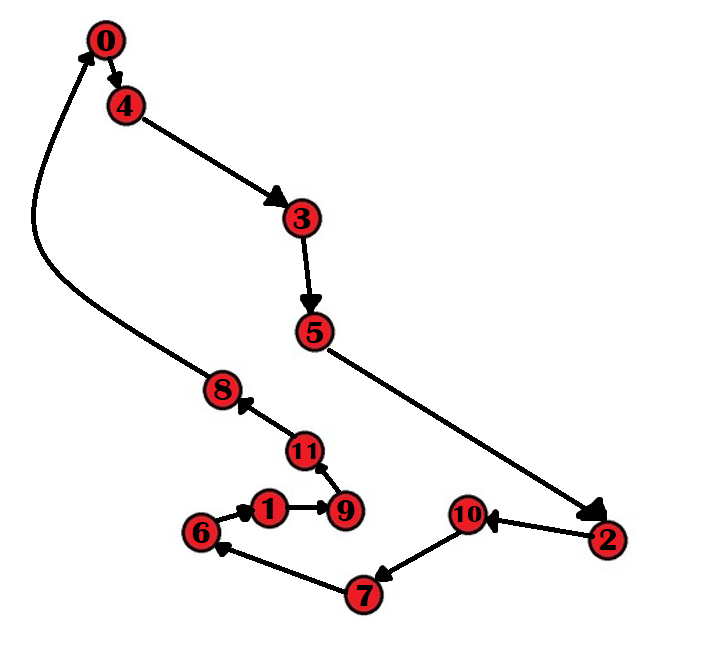![image.png]()

El algoritmo usado para este proyecto se trató de un modelo de optimización diseñado por gurobi, enlace a su página web: https://www.gurobi.com/